# Youtube Streaming Data Analysis
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT14kUqGX0caANR2-ezr751K4lMt1AN4FEW1w&usqp=CAU">


In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
#Reading the CSV files 
df=pd.read_csv("youtubers_df.csv",encoding='unicode_escape')

In [17]:
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,MÃºsica y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,United States,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,EducaciÃ³n,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000,United States,397400.0,14000,124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000,India,1100000.0,92500,164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,MÃºsica y baile,11700000,Unknown,211400.0,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000,India,14000.0,81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [7]:
df.shape

(1000, 9)

In [18]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,MÃºsica y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,United States,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,EducaciÃ³n,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   int64  
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   int64  
 7   Comments    1000 non-null   int64  
 8   Links       1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


## Data Cleaning

In [20]:
pd.isnull(df).sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
pd.isnull(df).sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

## Data Cleaning

In [21]:
df.rename(columns= {'Suscribers':'Subscribers'},inplace = True)

In [22]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [23]:
df.rename(columns= {'Username':'Channel'},inplace = True)

## Exploratory Data Analysis

In [24]:
df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


* From the above chart we can get mean of rank is approx 495

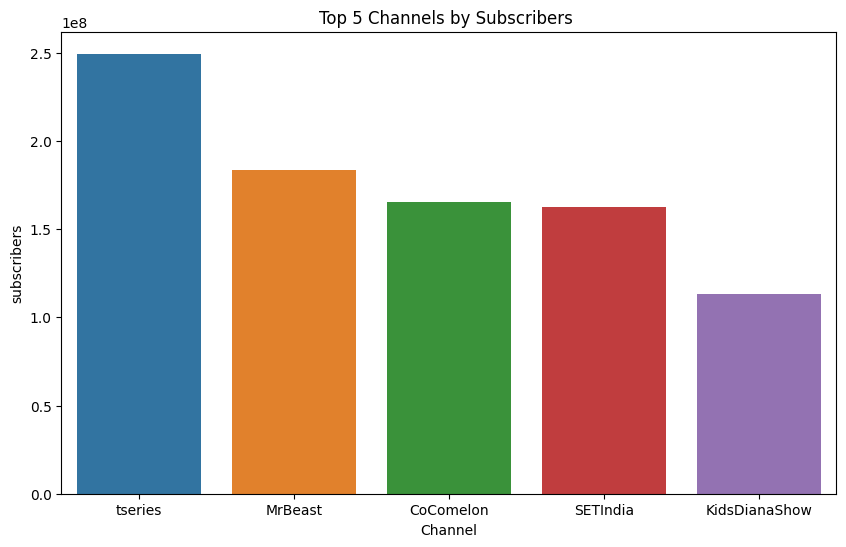

In [25]:
# Scatter plot of 'Username' vs. 'Subscribes' by position
Top_5_subscribers = df.sort_values(by ='Subscribers',ascending =False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Subscribers', data=Top_5_subscribers )
plt.xlabel('Channel')
plt.ylabel('subscribers')
plt.title('Top 5 Channels by Subscribers ')
plt.show()

* From the above chart we can say Tseries has the highest subscribers

In [26]:
top_countries = df['Country'].value_counts().head(10)

In [27]:
top_countries

Country
United States    293
India            241
Unknown          171
Brazil            64
Mexico            58
Indonesia         38
Rusia             25
Thailand          18
Colombia          16
Phillipines       13
Name: count, dtype: int64

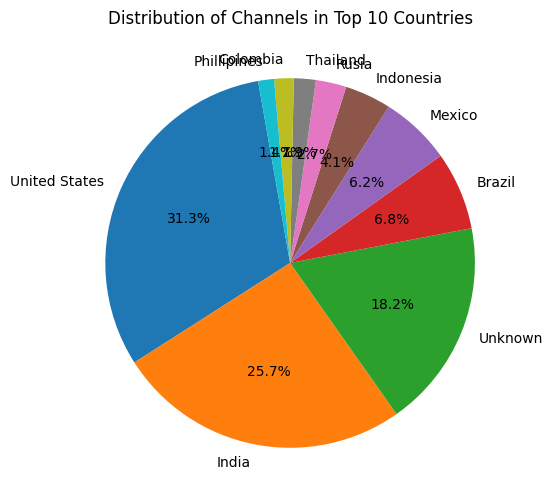

In [31]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.pie(top_countries,labels=top_countries.index,autopct='%1.1f%%', startangle=100)
plt.title('Distribution of Channels in Top 10 Countries')
plt.show()

* Above pie chart visualizataion shows United states and India contributes most share in distribution of channels among top 10 countries

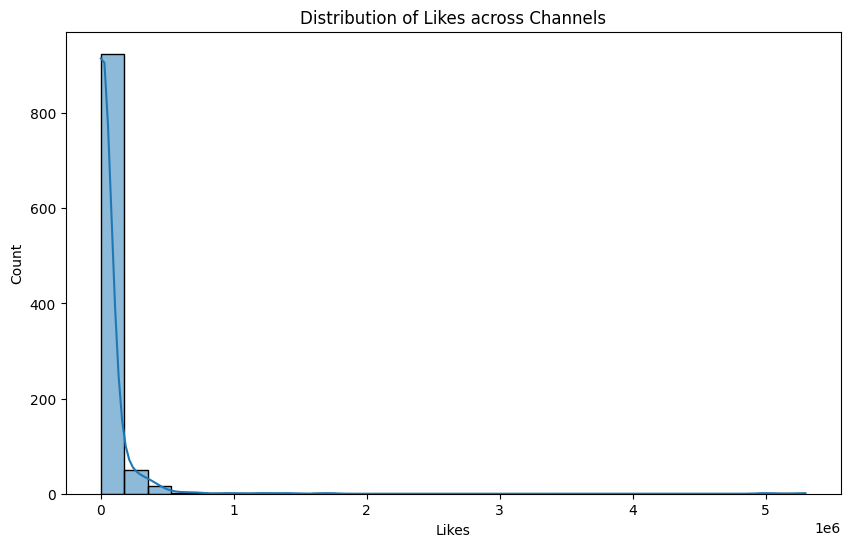

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['Likes'],bins= 30,kde=True)
plt.title('Distribution of Likes across Channels')
plt.xlabel('Likes')
plt.show()

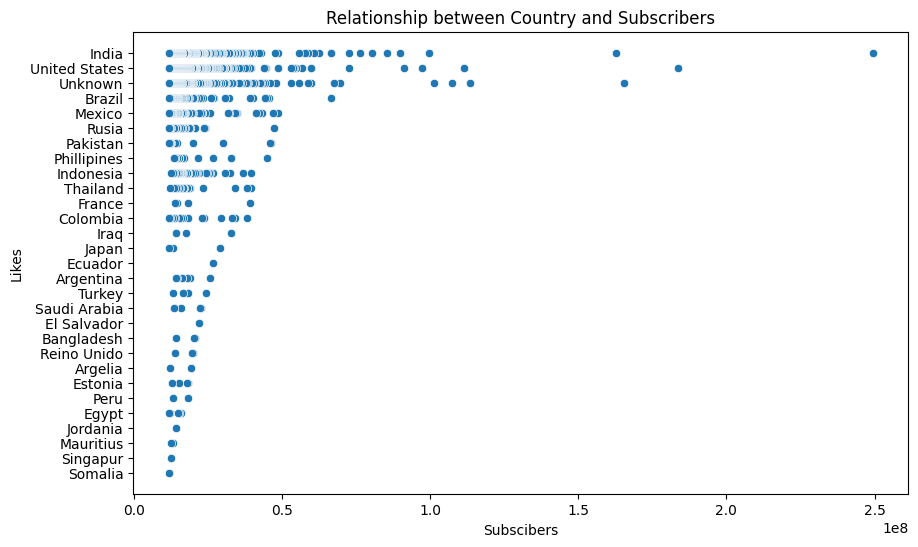

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'Subscribers',y='Country',data=df)
plt.title('Relationship between Country and Subscribers')
plt.xlabel('Subscibers')
plt.ylabel('Likes')
plt.show()

* From above chart we can vusualize that India and United states contributes most number of Subscribers across world

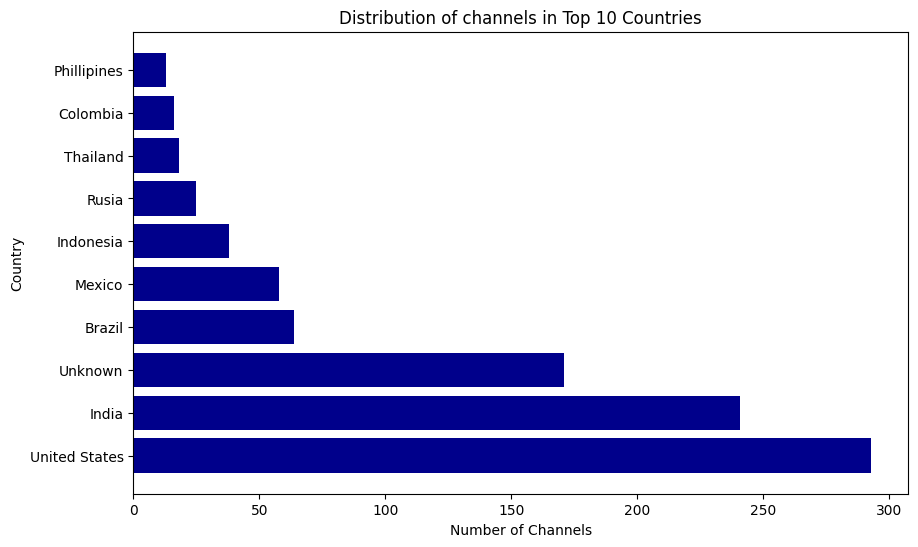

In [34]:
top_countries =  df['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(top_countries.index,top_countries,color='darkblue')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.title('Distribution of channels in Top 10 Countries')
plt.show()

* Above bar chart shows that United states secure top position by distribution of channels

##  Conclusion

####  From the above Data Analysis using various charts we can conclude that most number of Channels ,Subscribers and likes comes from two country i.e India and United States .The third position is not specified that stands in Third position .